This financial analysis project will help us to understand the financial situation of the company. We will create a dashboard using power-bi so that financial management team take effective decision. Before creating dashboard we need to clean data. For that we will import data into google colab and clean the data set.

**importing dataset**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
upload_file = files.upload()

Saving DataSet_Excel.xlsx to DataSet_Excel.xlsx


In [ ]:
df = pd.read_excel(r'DataSet_Excel.xlsx')
df.head(10)

,Region,Country,Sales Reps,First Name,Last Name,Gender,Age,Rank Levels,Rank,Products,Years,Quarter,Month,Revenue (USD)
0,Asia,Hong Kong,Louis N.,Louis,Ng,Male,44,A1,Store 1,Smartphones,2019,QTR 1,1,700693.985681
1,Asia,Hong Kong,Louis N.,Louis,Ng,Male,44,A1,Store 1,Laptops,2019,QTR 1,1,161814.256641
2,Asia,Hong Kong,Louis N.,Louis,Ng,Male,44,A1,Store 1,Assessories,2019,QTR 1,1,110696.261843
3,Asia,Hong Kong,Louis N.,Louis,Ng,Male,44,A1,Store 1,Tablets,2019,QTR 1,1,114058.102081
4,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Smartphones,2019,QTR 1,1,188219.508880
5,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Laptops,2019,QTR 1,1,5419.646320
6,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Assessories,2019,QTR 1,1,49997.639634
7,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Tablets,2019,QTR 1,1,8780.160234
8,Asia,Hong Kong,Edson L.,Edson,Lau,Male,28,D5,Store 5,Smartphones,2019,QTR 1,1,286032.890323
9,Asia,Hong Kong,Edson L.,Edson,Lau,Male,28,D5,Store 5,Laptops,2019,QTR 1,1,20691.104485


**understanding the dataset**

In [ ]:
df.describe()

,Age,Years,Month,Revenue (USD)
count,3264.000000,3264.000000,3264.000000,3.251000e+03
mean,34.272978,2019.500000,6.502757,3.914558e+04
std,6.312133,0.500077,3.451781,7.844398e+04
min,25.000000,2019.000000,1.000000,-4.007000e+03
25%,29.000000,2019.000000,4.000000,6.322023e+03
50%,32.000000,2019.500000,7.000000,1.506240e+04
75%,38.000000,2020.000000,10.000000,4.012134e+04
max,92.000000,2020.000000,12.000000,1.325328e+06


in this data set we are seeing that min age is 25 and max age is 92. This can be as outlire.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

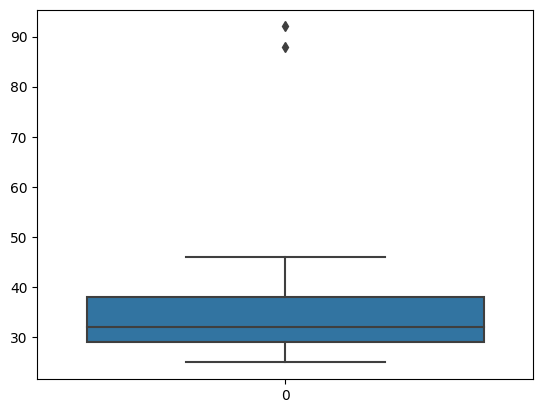

In [ ]:
sns.boxplot(df['Age'])
plt.show()

df['Age'].percentile(0.95)

In [ ]:
df['Age'].quantile(0.98)

46.0

In [ ]:
df[df['Age'] > df['Age'].quantile(0.98)]

,Region,Country,Sales Reps,First Name,Last Name,Gender,Age,Rank Levels,Rank,Products,Years,Quarter,Month,Revenue (USD)
164,Asia,Singapore,Michelle L.,Michelle,Lim,Female,92,D5,Store 5,Smartphones,2019,QTR 1,2,89554.861744
418,Asia,Hong Kong,Edson L.,Edson,Lau,Male,88,D5,Store 5,Assessories,2019,QTR 2,4,4311.504288


with the help of boxplot and parcentile method, we understand that these two data is outlire. so we will delete them.

In [ ]:
df = df.drop(df[df['Age'] > df['Age'].quantile(0.98)].index)

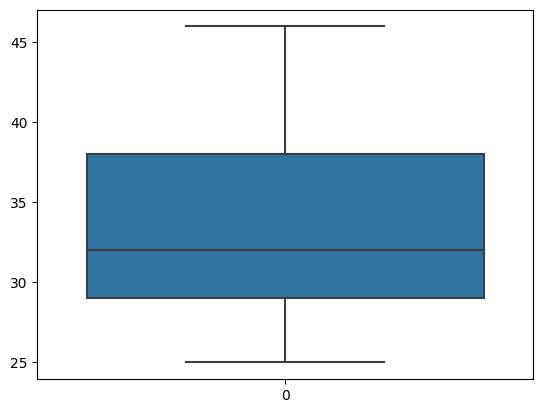

In [ ]:
sns.boxplot(df['Age'])
plt.show()

In [ ]:
df.describe()

,Age,Years,Month,Revenue (USD)
count,3262.000000,3262.000000,3262.000000,3.249000e+03
mean,34.238811,2019.500307,6.504905,3.914079e+04
std,6.161104,0.500077,3.451660,7.846077e+04
min,25.000000,2019.000000,1.000000,-4.007000e+03
25%,29.000000,2019.000000,4.000000,6.324465e+03
50%,32.000000,2020.000000,7.000000,1.506240e+04
75%,38.000000,2020.000000,10.000000,4.009008e+04
max,46.000000,2020.000000,12.000000,1.325328e+06


now there is another problem in revenue column. there are negative values which cannot be possible. Financial team requeated us to convert revenue from negative to positive if there is any. we can do this in two ways, using abs (absolute value) function = df[].abs() and using lambda function = lambda x: x*-1 if x < 0 else x

In [ ]:
df[df['Revenue (USD)'] < 0]

,Region,Country,Sales Reps,First Name,Last Name,Gender,Age,Rank Levels,Rank,Products,Years,Quarter,Month,Revenue (USD)
549,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Laptops,2019,QTR 2,5,-4007.0
605,U.S.A.,Las Vegas,Emma J.,Emma,Jones,Female,28,D5,Store 5,Laptops,2019,QTR 2,5,-1080.0
809,U.S.A.,Las Vegas,Emma J.,Emma,Jones,Female,28,D5,Store 5,Laptops,2019,QTR 2,6,-2225.0
2999,Asia,Hong Kong,Winnie C.,Winnie,Cheung,Female,35,C3,Store 2,Tablets,2020,QTR 4,11,-3113.0


In [ ]:
#df['Revenue (USD)'] = df['Revenue (USD)'].abs()

In [ ]:
df['Revenue (USD)'] = df['Revenue (USD)'].apply(lambda x: x * -1 if x < 0 else x)

In [ ]:
df[df['Revenue (USD)'] < 0]

,Region,Country,Sales Reps,First Name,Last Name,Gender,Age,Rank Levels,Rank,Products,Years,Quarter,Month,Revenue (USD)


In [ ]:
df['Revenue (USD)'].min()

105.57195263999999

**finding null values**

In [ ]:
df.isnull().sum()

Region            0
Country           0
Sales Reps        0
First Name        0
Last Name         0
Gender            0
Age               0
Rank Levels       0
Rank              0
Products          0
Years             0
Quarter           0
Month             0
Revenue (USD)    13
dtype: int64

there are 13 null values in Revenue column.

we have can drop them or

replace them with average revenue, or

we can replace them with previous value or

after values, or

we can replace them with the average of previous and following value.

In [ ]:
#df['Revenue (USD)'].dropna()

In [ ]:
#df['Revenue (USD)'].fillna(df['Revenue (USD)'].mean(), inplace=True)

In [ ]:
#df['Revenue (USD)'].fillna(method = 'bfill', inplace=True)

In [ ]:
#df['Revenue (USD)'].fillna(method = 'ffill', inplace = True)

To replace null values in a DataFrame with the average of the previous and following values for each null value, you can use the fillna() method in combination with the method parameter. You can set the method parameter to 'ffill' (forward fill) to fill missing values with the previous value and then set it to 'bfill' (backward fill) to fill missing values with the following value. Here's how you can do it:

**df['column'].fillna(method = 'bfill', inplace=True)**

**df['column'].fillna(method = 'ffill', inplace = True)**

In [ ]:
#df['Revenue (USD)'] = df['Revenue (USD)'].combine_first(df['Revenue (USD)'].shift() + df['Revenue (USD)'].shift(-1)) / 2


To fill the null values in the "revenue" column with the average of the previous and following values, you can use the fillna method along with the shift and combine_first.

**df['column'] = df['column'].combine_first(df['column'].shift() + df['column'].shift(-1)) / 2**

In this code, we first use the .shift() method to shift the "revenue" values by one position both upwards and downwards, effectively obtaining the previous and following values. Then, we use the .combine_first() method to replace null values with the average of the previous and following values. Finally, we divide the result by 2 to calculate the average.

**note : this method cannot be effective if ther are continious null values**

after detecting null values we communicate with financial team about that and they replied us to drop null values. so we will drop all the null values.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Region           0
Country          0
Sales Reps       0
First Name       0
Last Name        0
Gender           0
Age              0
Rank Levels      0
Rank             0
Products         0
Years            0
Quarter          0
Month            0
Revenue (USD)    0
dtype: int64

**converting dataframe into csv file**

In [ ]:
df.to_csv('DataSet_csv.csv', index=False)

**downloading the data set**

In [ ]:
files.download('DataSet_csv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>